
# **Contents:**


## **What will do:**

1. Use calculus and the chain rule to calculate partial derivatives e.g. $\frac{dL}{dw}$
2. Write a function that calculates partial derivatives
3. Adjust random inital weights to better approximate the $\sin(x)$ function
4. write the stocastic gradient descent optimizer from scratch


## **Stuff we will learn about:**

1. How do neural networks learn?
2. What is gradient descent?
  - getting stuck in local minima and maxima?
3. What does the optimizer do?
4. Hyperparameters:
  - Learning rate $\alpha$
  - Batch size
  - number of epochs

# **Recap and Jargon**




## *Jargon*


*   Neural network parameters: Matricies of weights and biases
*   Activation function: A non-linear function that adds non-linarity to the network
*   Loss function: error function that measures peroformance of the network
  - This is the the function that the network learns to minimise through training
*   Training: finding weights and biases that minimise the loss function
* Supervised learning: fitting neural network parameters such that the outputs of the neural network match the desired outputs



## **Neural networks are linear matrix multiplications with non-linear activation functions**


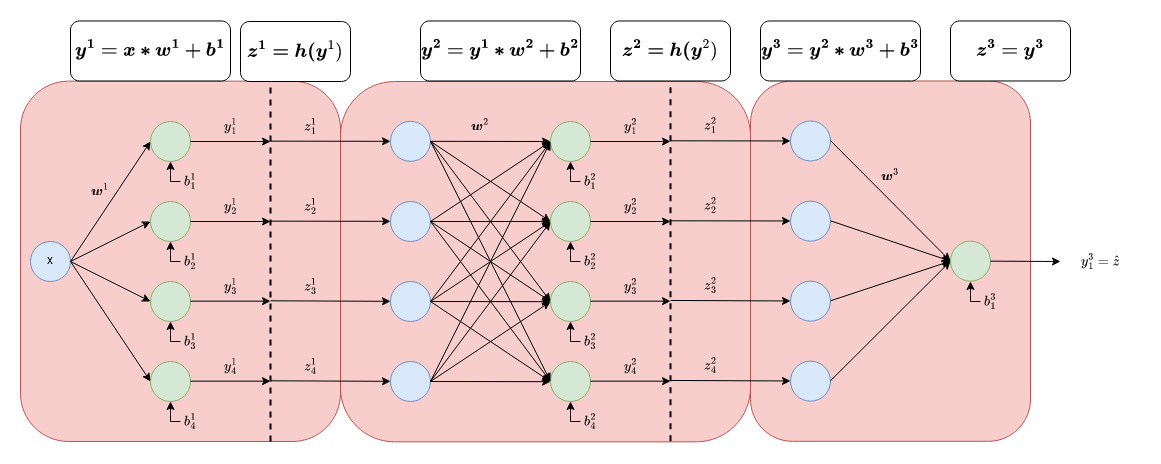


**Layer$^\boldsymbol{1}$ parameters**


$w^1 = \begin{bmatrix}
w_1^1 \\ w_2^1 \\ w_3^1 \\ w_4^1
\end{bmatrix}$

$b^1 = \begin{bmatrix}
b_1^1 \\ b_2^1 \\ b_3^1 \\ b_4^1
\end{bmatrix}$

**Layer$^\boldsymbol{2}$ parameters**



$w^2 = \begin{bmatrix}
w_{11}^2 & w_{12}^2 & w_{13}^2 & w_{14}^2 \\
w_{21}^2 & w_{22}^2 & w_{23}^2 & w_{24}^2 \\
w_{31}^2 & w_{32}^2 & w_{33}^2 & w_{34}^2 \\
w_{41}^2 & w_{42}^2 & w_{43}^2 & w_{44}^2 \\
\end{bmatrix}$

$b^1 = \begin{bmatrix}
b_1^2 \\ b_2^2 \\ b_3^2 \\ b_4^2
\end{bmatrix}$

**Layer$^\boldsymbol{3}$ parameters**

$w^3 = \begin{bmatrix}
w_1^3 & w_2^3 & w_3^3 & w_4^3
\end{bmatrix}$

$b^3 = \begin{bmatrix}
b_1^3
\end{bmatrix}$


In [ ]:
import numpy as np

w1 = np.random.random(4).reshape((1,4))
b1 = np.zeros((1, 4))

w2 = np.random.random(16).reshape((4,4))
b2 = np.zeros((1, 4))

w3 = np.random.random(4).reshape((4, 1))
b3 = np.zeros((1, 1))



[[0.71487165 0.89273625 0.76395392 0.58358833]]


# **Gradient Descent theory** $



The gradient is pointing in the direction of increasing y, if we want to decrease y we simply move in the opposite direction.


As an algorihtm:

1.   initialise x randomly.
2.   calculate $\frac{dy}{d\text{x}}$.
3.   update the value of x to:  x  $\leftarrow \text{x} - \alpha\frac{d\text{y}}{d\text{x}}$.
4.    Calculate current value of y.
5.    if y $\geq \text{y}_{\text{target}}$ repeat steps 2-5. 

Where $\alpha$ is a step size factor $\alpha \; \epsilon \; (0, 1]$ 




### **Gradient Descent Example: y=x^2**



consider $y=x^2$, then $\frac{dy}{dx}=2x$

Imagine our starting point is x = 2, then y = 4. 

**The goal is to find the value of x that minimises y**

inital conditions: $x_0 = 2,\; \alpha= 0.1,\; y_{target} = 2$

step 2-> $\frac{dy}{dx} = 4$

step 3 -> $x_1 = 2-0.1*4=1.6$

step 4 -> $y_1=x_1^2=2.56$

step 5 -> $y_1<y_{target}\;?\;\;\;\;\;\times$ repeat from step 2

step 2 -> $\frac{dy}{dx} = 3.2$

step 3 -> $x_{2} = 1.6- 0.1*3.2 = 1.28$

step 4 -> $y_2=x_2^2=1.6384$

step 5 -> $y_2<y_{target}\;?\;\;\;\;\;\times$ repeat from step 2

etc. We can see that we are slowly decreasing y.

In [ ]:
import numpy as np

def get_dydx(x):
  return 2*x

#parameters
x0 = 4.0
alpha = 0.2
y_target = 0.01

#set inital conditions
y=x0**2
x=x0
print("starting value of x:{} and y: {}".format(x,y))

loop_counter = 0
while True:
  dydx=get_dydx(x)

  x = x - alpha*dydx

  y = x**2

  print("Current value of x:{}, y: {}, and dydx: {}".format(f'{x:.3}',f'{y:.3}',f'{dydx:.3}'))

  if (y<y_target):
    print("Found value of x: {} that minimises y: {} sufficiently".format(x,y))
    break
  
  if loop_counter>100:
    print("this isnt getting anywhere!")
    break
  else:
    loop_counter = loop_counter +1


starting value of x:4.0 and y: 16.0
Current value of x:2.4, y: 5.76, and dydx: 8.0
Current value of x:1.44, y: 2.07, and dydx: 4.8
Current value of x:0.864, y: 0.746, and dydx: 2.88
Current value of x:0.518, y: 0.269, and dydx: 1.73
Current value of x:0.311, y: 0.0967, and dydx: 1.04
Current value of x:0.187, y: 0.0348, and dydx: 0.622
Current value of x:0.112, y: 0.0125, and dydx: 0.373
Current value of x:0.0672, y: 0.00451, and dydx: 0.224
Found value of x: 0.06718463999999999 that minimises y: 0.004513775851929598 sufficiently


### **Re run the cell below with differnt values of alpha, x0 and y_target**

try 

alpha = 0.2, 0.8, 1

x0 = 0.5, 1, 2 , 20

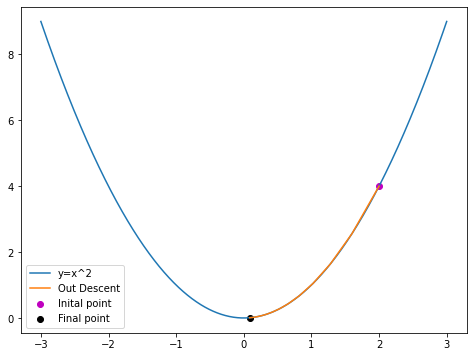

In [ ]:
#making a nice plot
alpha = 0.1
x0 = 2.0

x=x0
y=x0**2

x_plot = [x]
y_plot = [y]

loop_counter=0
while True:
  dydx=get_dydx(x)
  x = x - alpha*dydx
  y = x**2
  x_plot.append(x)
  y_plot.append(y)

  if (y<y_target):
    break

  if loop_counter>100:
    print("this isnt getting anywhere!")
    break
  else:
    loop_counter = loop_counter +1

from matplotlib import pyplot as plt

x_range = np.linspace(-int(max(x,x0))-1,int(max(x,x0))+1,1000)
plt.plot(x_range, x_range**2, label="y=x^2")
plt.plot(x_plot, y_plot, label="Out Descent")
plt.scatter(x0,x0**2,label="Inital point",c="m")
plt.scatter(x,x**2,label="Final point", c="k")
plt.legend()
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

# **Local Minima and the dreaded optimizer**

consider trying gradient descent on $y=x^4 - 5 x^3 + 7 x^2 - x + 1$ with $x_0 = 2.5$, $y_{target}=1.7$

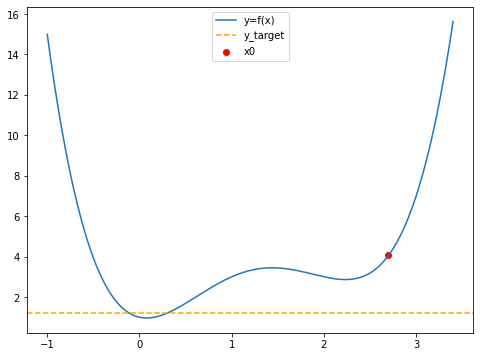

In [ ]:
get_y = lambda x: x**4 - 5*x**3 + 7*x**2 - x + 1

x_points = np.linspace(-1, 3.4, 1000)

plt.plot(x_points, get_y(x_points),label="y=f(x)")
plt.scatter(2.7, get_y(2.7),c="r", label="x0")
plt.axhline(1.2, linestyle="--",c="orange",label="y_target")
plt.legend()
plt.show()


starting value of x:2.7 and y: 4.06
Current value of x:2.08, y: 2.93, and dydx: 6.18
Current value of x:2.16, y: 2.88, and dydx: -0.774
Current value of x:2.2, y: 2.87, and dydx: -0.437
Current value of x:2.22, y: 2.86, and dydx: -0.19
Current value of x:2.23, y: 2.86, and dydx: -0.0691
Current value of x:2.23, y: 2.86, and dydx: -0.023
Current value of x:2.23, y: 2.86, and dydx: -0.00743
Current value of x:2.23, y: 2.86, and dydx: -0.00237
Current value of x:2.23, y: 2.86, and dydx: -0.000753
Current value of x:2.23, y: 2.86, and dydx: -0.000239
Current value of x:2.23, y: 2.86, and dydx: -7.58e-05
Current value of x:2.23, y: 2.86, and dydx: -2.4e-05
Current value of x:2.23, y: 2.86, and dydx: -7.63e-06
Current value of x:2.23, y: 2.86, and dydx: -2.42e-06
Current value of x:2.23, y: 2.86, and dydx: -7.68e-07
Current value of x:2.23, y: 2.86, and dydx: -2.44e-07
Current value of x:2.23, y: 2.86, and dydx: -7.73e-08
this isnt getting anywhere!


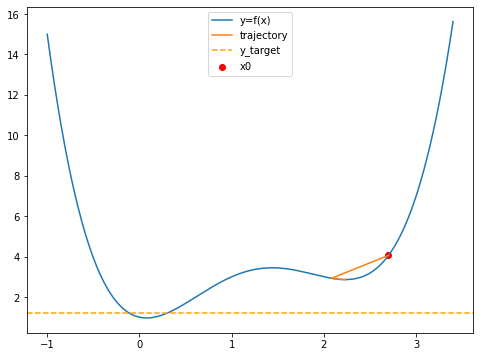

In [ ]:
def get_y(x):
  return x**4 - 5*x**3 + 7*x**2 - x + 1

def get_dydx(x):
  return 4*(x**3) - 15*(x**2) + 14*x -1


def fit(y_target=1.2,x0=2.5, alpha=0.3):
  #set starting values
  y=get_y(x0)
  x=x0
  print("starting value of x:{} and y: {}".format(x,f'{y:.3}'))

  #store values for plots
  x_plot = [x0]
  y_plot = [get_y(x0)]

  loop_counter = 0
  while True:
    dydx=get_dydx(x)
    x = x - alpha*dydx
    y = get_y(x)

    print("Current value of x:{}, y: {}, and dydx: {}".format(f'{x:.3}',f'{y:.3}',f'{dydx:.3}'))

    #store values for plots
    x_plot.append(x)
    y_plot.append(y)


    if (y<y_target):
      print("Found value of x: {} that minimises y: {} sufficiently".format(f'{x:.3}',f'{y:.3}'))
      break
    
    if loop_counter>15:
      print("this isnt getting anywhere!")
      break
    else:
      loop_counter = loop_counter +1

  #making a nice plot
  x_points = np.linspace(-1, 3.4, 1000)
  plt.plot(x_points, get_y(x_points),label="y=f(x)")
  plt.plot(x_plot, y_plot, label="trajectory")
  plt.scatter(x0, get_y(x0),c="r", label="x0")
  plt.axhline(y_target, linestyle="--",c="orange",label="y_target")
  plt.legend()
  plt.show()



#Trt the following (x0,alpha) combinations [(2.7, 0.4), (2.7, 0.3), (2.7, 0.2), (2.7, 0.1), (3, 0.01)]
fit(x0=2.7, alpha=0.1)

## **The optimizer**

Notice how differnt values of the stepsize could make us either find the true minimum, or get stuck in a local minima, or even cause us to completely diverge from the minimum point

*    is responsible for scheduling the stepsize e.g. how much do we update the neural network parameters on each iteration
*    In deeplearning the stepsize is called the "learning rate"
*    What we have done so far is almost exactly Stocastic Gradient Descent (SGD)
  -  The part we are missing is that SGD looks at multiple points at once rather than a single point at a time 
  -  The number of points considered at a time is the batch_size!
  -  We have been using SGD with a batch size of 1. e.g. we look at 1 point at a time


*    We could consider the momentum e.g. we allow moving in a direction that increases the loss up until we reach the same height we did before.
  - this is called SGD with momentum


# **Gradient Descent for a single data point in $\sin(2\pi x)$**



**Our Network:**

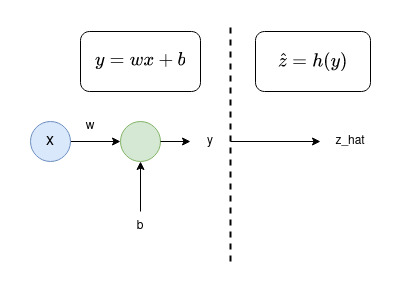


**We do the exact same thing as we did before: just now $y=L$ and instead of 1 x parameter we are trying to tune 2 parameters: w, b**


loss function $L = (z-\hat{z})^2$

activation function $\hat{z} = h(y) = \frac{1}{1+e^{-y}}$

linear part $y = w*x +b$

**First we need to calculate a formula for the partial derivatives**

$\frac{dL}{dw} = \frac{dL}{d\hat{z}} * \frac{d\hat{z}}{dy} * \frac{dy}{dw}$

$\frac{dL}{db} = \frac{dL}{d\hat{z}} * \frac{d\hat{z}}{dy} * \frac{dy}{db}$

This has 4 partial derivatives: $\frac{dL}{d\hat{z}}$, $\frac{d\hat{z}}{dy}$, $\frac{dy}{dw}$, $\frac{dy}{db}$

$\frac{dL}{d\hat{z}}$ = $-2(z-\hat{z})$

$\frac{d\hat{z}}{dy} = \frac{1}{1+e^{-y}}*(1 - \frac{1}{1+e^{-y}}) = h(y)*(1-h(y))$

$\frac{dy}{dw} = x$


$\frac{dy}{db} = 1$


**Finally:**

$\frac{dL}{dw} = -2(z-\hat{z})*h(y)*(1-h(y))*x$

$\frac{dL}{db} = -2(z-\hat{z})*h(y)*(1-h(y))$

In [ ]:
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

def SE(z, z_hat):
  return (z-z_hat)**2

#changing to L, h notation
h=sigmoid
L=SE

#create a dataset of 1 point
x = 0.25 # so that we are asking for sin(pi/2) which is 1
z_true = np.sin(2*np.pi*x)

#set our stepsize parameter
alpha=1

#set the weight to be some random number and the bias to 0
w0 = np.random.random()
b0 = 0.0

w=w0
b=b0
print("The inital value of the weight is: {}, the inital value of the bias is: {}".format(f'{w:.3}', f'{b:.3}'))


y = w*x+b
z_hat = h(y)
print("For x = {}, y = {} and then z = {}, the actual value of sin(pi/2) is {}".format(x, f'{y:.3}',f'{z_hat:.3}', z_true))

print("This gives a means squared loss of :{}".format(f'{L(z_true, z_hat):.3}'))



The inital value of the weight is: 0.578, the inital value of the bias is: 0.0
For x = 0.25, y = 0.145 and then z = 0.536, the actual value of sin(pi/2) is 1.0
This gives a means squared loss of :0.215


In [ ]:
def calc_dLdw(z, z_hat, y, x):
  dLdw = -2*(z-z_hat)*h(y)*(1-h(y))*x
  return dLdw

def calc_dLdb(z, z_hat, y):
  dLdb = -2*(z-z_hat)*h(y)*(1-h(y))
  return dLdb

#calculate the partial derivatives
dLdw = calc_dLdw(z_true, z_hat,y,x)
dLdb = calc_dLdb(z_true, z_hat,y)

#update the weights and biases of the network so as to minimise the loss
w = w-alpha*dLdw
b = b-alpha*dLdb

#print new values of weight and bias
print("The new value of the weight is: {}, the new value of the bias is: {}".format(f'{w:.3}', f'{b:.3}'))

#calculate the new y approximation using the new value of the weight and bias
y = w*x+b
z_hat = h(y)
print("For x = {}, y = {} and then z = {}".format(x, f'{y:.3}',f'{z_hat:.3}'))

print("This gives a new mean squared loss of :{}".format(f'{L(z_true, z_hat):.3}'))
print("OMG ITS LESS")



The new value of the weight is: 0.814, the new value of the bias is: 0.943
For x = 0.25, y = 1.15 and then z = 0.759
This gives a new mean squared loss of :0.0582
OMG ITS LESS


### **We can stick this into a for loop to repeatebly minimise the loss**

In [ ]:
#reset w and b
w = w0
b = b0

num_epochs = 20

for epoch in range(num_epochs):
  #calculate z,y
  y = w*x+b
  z_hat = h(y)


  #calculate the partial derivatives
  dLdw = calc_dLdw(z_true, z_hat,y,x)
  dLdb = calc_dLdb(z_true, z_hat,y)

  #update the weights and biases of the network so as to minimise the loss
  w = w-alpha*dLdw
  b = b-alpha*dLdb

  print("Epoch: {}, Loss:{}".format(epoch,f'{L(z_true, z_hat):.3}'))


print("Final values of w:{} and b:{}".format(w, b))

Epoch: 0, Loss:0.215
Epoch: 1, Loss:0.163
Epoch: 2, Loss:0.126
Epoch: 3, Loss:0.1
Epoch: 4, Loss:0.0818
Epoch: 5, Loss:0.0683
Epoch: 6, Loss:0.0582
Epoch: 7, Loss:0.0504
Epoch: 8, Loss:0.0442
Epoch: 9, Loss:0.0393
Epoch: 10, Loss:0.0353
Epoch: 11, Loss:0.0319
Epoch: 12, Loss:0.0291
Epoch: 13, Loss:0.0267
Epoch: 14, Loss:0.0247
Epoch: 15, Loss:0.0229
Epoch: 16, Loss:0.0214
Epoch: 17, Loss:0.02
Epoch: 18, Loss:0.0188
Epoch: 19, Loss:0.0177
Final values of w:0.9928689134552532 and b:1.6592074344804577


### **Notes on what we have just done**

*   We have not actually learnt to fit the $\sin(2\pi x)$ function we are only fitting 1 point.
*   The sigmoid function is not a suitable activation function for this problem
    *   $\hat{z} \epsilon  (0, 1)$  negative values not possible in the output
- $\hat{z} \rightarrow 1.0$ as $w, b\rightarrow∞$



# **Now lets add more parameters to our network**

In [ ]:
def h1(x):           #relu function
  return max(0, x)

def L(z, z_hat):     #squared error
  return (z-z_hat)**2

#create a dataset
num_points = 1001
x = np.linspace(0, 1, num_points) # x data points
z_true = np.sin(x*2*np.pi)  # z true points we want to approximate

#initalise parameters of network
w0 = np.randon.random()
b0 = 0.0

#hyper parameters
alpha = 0.1
num_epochs = 10


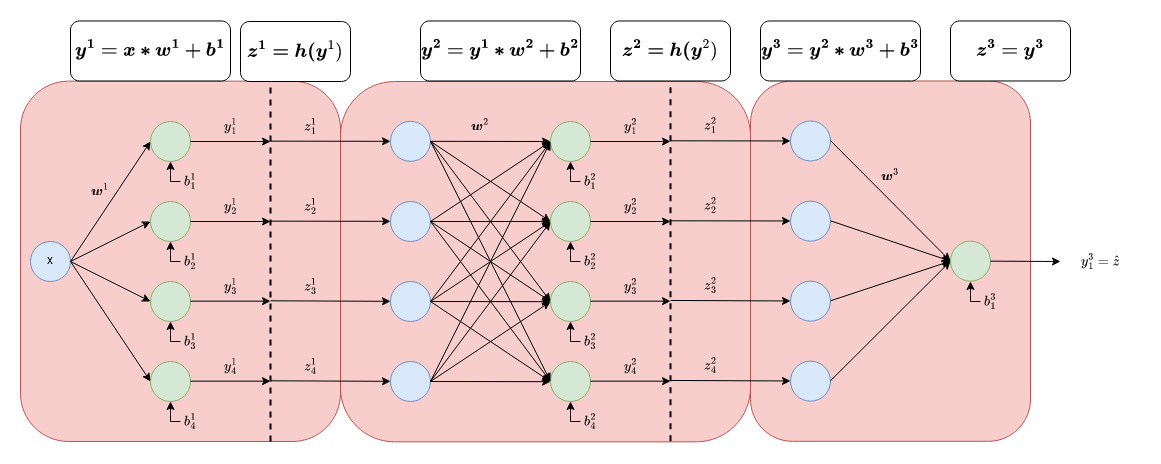


**Layer$^\boldsymbol{1}$ parameters**


$w^1 = \begin{bmatrix}
w_1^1 \\ w_2^1 \\ w_3^1 \\ w_4^1
\end{bmatrix}$

$b^1 = \begin{bmatrix}
b_1^1 \\ b_2^1 \\ b_3^1 \\ b_4^1
\end{bmatrix}$

**Layer$^\boldsymbol{2}$ parameters**



$w^2 = \begin{bmatrix}
w_{11}^2 & w_{12}^2 & w_{13}^2 & w_{14}^2 \\
w_{21}^2 & w_{22}^2 & w_{23}^2 & w_{24}^2 \\
w_{31}^2 & w_{32}^2 & w_{33}^2 & w_{34}^2 \\
w_{41}^2 & w_{42}^2 & w_{43}^2 & w_{44}^2 \\
\end{bmatrix}$

$b^1 = \begin{bmatrix}
b_1^2 \\ b_2^2 \\ b_3^2 \\ b_4^2
\end{bmatrix}$

**Layer$^\boldsymbol{3}$ parameters**

$w^3 = \begin{bmatrix}
w_1^3 & w_2^3 & w_3^3 & w_4^3
\end{bmatrix}$

$b^3 = \begin{bmatrix}
b_1^3
\end{bmatrix}$


**Layer 1 forward pass**

$y^1 = w^1*x+b^1$

$z^1 = h^1(y^1) = Relu(y^1)$

**Layer 2 forward pass**

$y^2 = w^2*z^1+b^2$

$z^2 = h^2(y^2) = Relu(y^2)$

**Layer 3 forward pass**

$y^3 = w^3*z^2+b^3$

$z^3 = h^3(y^3) = \tanh(y^3)$

**Loss function**

$L = (z-\hat{z})^2$

**Gradient Descent**

$\delta^L =-2*(z-\hat{z})$

$\delta^i = (w^{i+1})^T\delta^{i+1}\odot \frac{dh^i}{dy^i}(w^i)$

$\frac{dL}{dw^i} = \delta^i*(z^{i-1})^T$

$\frac{dL}{db^i} = \delta^i$


**Update rule**
(essentially the same as its always been)

$w_i = w_i-\alpha * \frac{dL}{dw^i}$

$b_i = b_i-\alpha * \frac{dL}{db^i}$

for more details see: https://medium.com/analytics-vidhya/backpropagation-for-dummies-e069410fa585


In [47]:
import numpy as np

def tanh(x):
  return np.tanh(x)

def ReLu(x):           #relu function
  return np.maximum(0, x)

def dtan_dx(x):
  return 1- (np.tanh(x))**2

def dReLu_dx(x): 
  p = x
  p[p<=0.0] = 0.0   # set all values less than 0 to 0
  p[p>0.0] = 1.0    # set all values greater than 0 to 1
  return p

def SE(z, z_hat):     #squared error
  return (z-z_hat)**2

def dSE_dz_hat(z, z_hat):
  return -2*(z-z_hat)

#Initialise First layer parameters ,and activation function
w1_0 = np.random.random(4).reshape((4, 1))
b1_0 = np.zeros((4,1))
h1 = ReLu
get_dh1_dy1 = dReLu_dx

#Initialise Second layer parameters and activation function
w2_0 = np.random.random(4*4).reshape((4, 4))
b2_0 = np.zeros((4,1))
h2 = ReLu
get_dh2_dy2 = dReLu_dx

#Initialise Third layer parameters and activation function
w3_0 = np.random.random(4).reshape((1, 4))
b3_0 = np.zeros((1,1))
h3 = tanh
get_dh3_dy3 = dtan_dx

#foward pass function e.g. h(x*w +b)
get_y = lambda x, w, b: np.matmul(w, x)+b


## **Training on a single data point at a time**

In [48]:
#define loss function 
L = SE
get_dL_dz3 = dSE_dz_hat

#define a stepsize
alpha = 0.01

#set up weights and biases for this training
w1 = w1_0
b1 = b1_0
w2 = w2_0
b2 = b2_0
w3 = w3_0
b3 = b3_0

#numbert of times to iterate over dataset
num_epochs = 10

#create a dataset
num_points = 2001
x_dataset = np.linspace(0, 1, num_points) # x data points
np.random.shuffle(x_dataset)
z_true_dataset = np.sin(x_dataset*2*np.pi)  # z true points we want to approximate

for epoch in range(num_epochs):

  loss_dataset = 0
  for x, z_true in zip(x_dataset, z_true_dataset):
    y1 = get_y(np.array([[x]]), w1, b1)
    z1 = h1(y1)
    y2 = get_y(z1, w2, b2)
    z2 = h2(y2)
    y3 = get_y(z2, w3, b3)
    z3 = h3(y3)
    loss = L(z_true, z3)

    dL_dz3  = get_dL_dz3(z_true, z3)
    dz3_dy3 = get_dh3_dy3(y3)
    dz2_dy2 = get_dh2_dy2(y2)
    dz1_dy1 = get_dh2_dy2(y2)

    delta_3 = np.matmul(dL_dz3,dz3_dy3)
    delta_2 = np.multiply(np.matmul(w3.T, delta_3), dz2_dy2)
    delta_1 = np.multiply(np.matmul(w2.T, delta_2), dz1_dy1)

    dL_dw3 = np.matmul(delta_3, z2.T)
    dL_dw2 = np.matmul(delta_2, z1.T)
    dL_dw1 = np.matmul(delta_1, [[x]])

    w1 = w1 - alpha*dL_dw1
    b1 = b1 - alpha*delta_1
    w2 = w2 - alpha*dL_dw2
    b2 = b2 - alpha*delta_2
    w3 = w3 - alpha*dL_dw3
    b3 = b3 - alpha*delta_3
    loss_dataset += loss[0, 0]

  print(loss_dataset)


994.1727509900409
275.8015483540114
175.09839716667113
173.44771906014174
173.250519770707
173.15447372217463
173.05679044327826
172.94595798590703
172.8171335304846
172.66861839915447


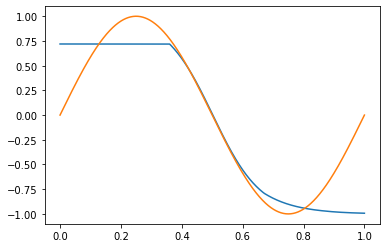

In [49]:
from matplotlib import pyplot as plt

#create a test dataset
num_points = 1001
x_test = np.linspace(0, 1, num_points).reshape((1, num_points)) # x data points
z_test = np.sin(x_test*2*np.pi)  # z true points we want to approximate

y1 = get_y(x_test, w1, b1)
z1 = h1(y1)
y2 = get_y(z1, w2, b2)
z2 = h2(y2)
y3 = get_y(z2, w3, b3)
z3 = h3(y3)
loss = L(z_true, z3)

z_predictions = z3

plt.plot(x_test[0], z_predictions[0])
plt.plot(x_test[0],z_test[0])
plt.show()



### **Verifying using tensorflow**

Epoch 1/10
2001/2001 [==============================] - 2s 874us/step - loss: 0.1580
Epoch 2/10
2001/2001 [==============================] - 2s 891us/step - loss: 0.0882
Epoch 3/10
2001/2001 [==============================] - 2s 881us/step - loss: 0.0871
Epoch 4/10
2001/2001 [==============================] - 2s 879us/step - loss: 0.0870
Epoch 5/10
2001/2001 [==============================] - 2s 863us/step - loss: 0.0870
Epoch 6/10
2001/2001 [==============================] - 2s 885us/step - loss: 0.0870
Epoch 7/10
2001/2001 [==============================] - 2s 875us/step - loss: 0.0870
Epoch 8/10
2001/2001 [==============================] - 2s 926us/step - loss: 0.0870
Epoch 9/10
2001/2001 [==============================] - 2s 1ms/step - loss: 0.0870
Epoch 10/10
2001/2001 [==============================] - 2s 884us/step - loss: 0.0870


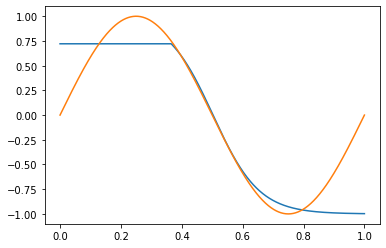

In [51]:
from tensorflow import keras

#build network
model_sin = keras.Sequential([keras.layers.Input(1,),
                              keras.layers.Dense(4, activation='relu'),
                             keras.layers.Dense(4, activation='relu'),
                             keras.layers.Dense(1, activation='tanh')])

#train
loss_func = keras.losses.MeanSquaredError()
optiimizer=keras.optimizers.SGD(learning_rate=alpha)
model_sin.compile(loss=loss_func, optimizer=optiimizer)#initalises the weights and biases of the model
model_sin.fit(x=x_dataset, y=z_true_dataset, epochs=num_epochs, batch_size=1)

#test
z_predictions_keras = model_sin(x_test[0,:])



plt.plot(x_test[0], z_predictions_keras)
plt.plot(x_test[0],z_test[0])
plt.show()

## **Training on multiple data points at a time**

$L =\frac{1}{n}\sum\limits_{i=1}^{n}(z-\hat{z})^2$

In [ ]:
def MSE(z, z_hat):     #squared error
  return np.array([[np.mean((z-z_hat)**2)]])

def dMSE_dz_hat(z, z_hat):
  return np.array([[-2*np.mean((z-z_hat))]])


#define loss function 
L = MSE
get_dL_dz3 = dMSE_dz_hat

#define a stepsize
alpha = 0.1
batch_size = 64

#set up weights and biases for this training
w1 = w1_0
b1 = b1_0
w2 = w2_0
b2 = b2_0
w3 = w3_0
b3 = b3_0

#create a dataset
num_points = 1280
x_points = np.linspace(0, 1, num_points) # x data points
np.random.shuffle(x_points)
x_dataset = np.array(np.split(x_points, num_points/batch_size))
z_true_dataset = np.sin(x_dataset*2*np.pi)  # z true points we want to approximate

#fit() loop
for epoch in range(num_epochs):

  loss_dataset = 0
  for x, z_true in zip(x_dataset, z_true_dataset):
    y1 = get_y(np.array([x]), w1, b1)
    z1 = h1(y1)
    y2 = get_y(z1, w2, b2)
    z2 = h2(y2)
    y3 = get_y(z2, w3, b3)
    z3 = h3(y3)
    loss = L(z_true, z3)

    dL_dz3  = get_dL_dz3(z_true, z3)
    dz3_dy3 = get_dh3_dy3(y3)
    dz2_dy2 = get_dh2_dy2(y2)
    dz1_dy1 = get_dh2_dy2(y2)

    delta_3 = np.matmul(dL_dz3, dz3_dy3)
    delta_2 = np.multiply(np.matmul(w3.T, delta_3), dz2_dy2)
    delta_1 = np.multiply(np.matmul(w2.T, delta_2), dz1_dy1)

    dL_dw3 = np.matmul(delta_3, z2.T)
    dL_dw2 = np.matmul(delta_2, z1.T)
    dL_dw1 = np.matmul(delta_1, np.array([x]).T)

    w1 = w1 - alpha*dL_dw1
    b1 = b1 - alpha*delta_1
    w2 = w2 - alpha*dL_dw2
    b2 = b2 - alpha*delta_2
    w3 = w3 - alpha*dL_dw3
    b3 = b3 - alpha*delta_3
    loss_dataset += loss[0, 0]

  print(loss_dataset)

# **Vanishing gradient problem**

## **vanishing Gradient task**

### **Use the chain rule to find an expression for the  partial derivative of $L(z_5)$ w.r.t $w_1$ in terms of of partial derivtaives for:**

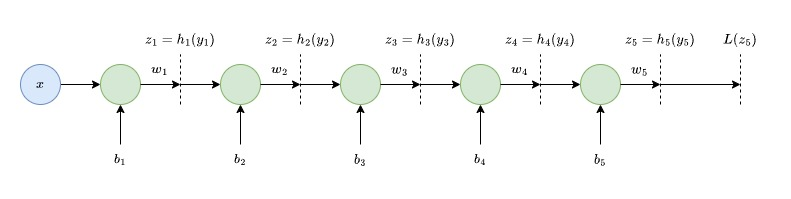


### **Answer:**




$\frac{dL}{dw_1} = \frac{dL}{dz_5}*\frac{dz_5}{dy_5}*\frac{dy_5}{dz_4}*\frac{dz_4}{dy_3}*\frac{dy_3}{dz_2}*\frac{dz_2}{dy_1}*\frac{dy_1}{dw_1}$

**with:**

$\frac{dz_i}{dy_i} = \frac{dh_i}{dy_i}$    (e.g. derivative of activation function)

$\frac{dy_i}{dz_{i-1}} = w_i$

$\frac{dy_i}{dw_{i}} = z_{i-1}$ with case for input: $\frac{dy_1}{dw_{1}} = x$

**Putting it all together:**

$\frac{dL}{dw_1} = \frac{dL}{dz_5}*\frac{dh_5}{dy_5}*w_5*\frac{dh_4}{dy_4}*w_4*\frac{dh_3}{dy_3}*w_3*\frac{dh_2}{dy_2}*w_2*x$

$\;\;\;\;\;\;\;= \frac{dL}{dz_5} * \prod\limits_{i=2}^5(\frac{dh_i}{dy_i}*w_i)*x$

**Generally: $w<1$ and $\frac{dh_i}{dy_i}<1$**

**As the number of layers increases the gradient fades to 0, drastically slowing or preventing training**


# **MNIST Dataset for grand written figure classifcation**

### **The Dataset**

each image is 28 pixels by 28 pixels
Here is the top left corner of the image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253]
 [  0   0   0   0   0   0   0   0  80 156 107 253 253 205]
 [  0   0   0   0   0   0   0   0   0  14   1 154 253  90]
 [  0   0   0   0   0   0   0   0   0   0   0 139 253 190]
 [  0   0   0   0   0   0   0   0   0   0   0  11 190 253]
 [  0   0   0   0   0   0   0   0   0   0   0   0  35 241]]


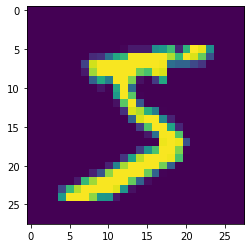

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])

print("each image is 28 pixels by 28 pixels")
print("Here is the top left corner of the image")
print(x_train[0][0:14,0:14])

### **One hot encoding:**

In [ ]:
print("The first training image shows a: {}".format(y_train[0]))


y_train_onehot = np.zeros((y_train.shape[0], 10))
for i in range(y_train.shape[0]):
  y_train_onehot[i, y_train[i]] = 1

print("new encoding:")
print(y_train_onehot[0])

print("the shape of the labels is now: {}".format(y_train_onehot.shape))


The first training image shows a: 5
new encoding:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
the shape of the labels is now: (60000, 10)


### **Building the network**

In [ ]:
MNIST_model = keras.Sequential([keras.Input((28, 28)),
                               keras.layers.Flatten(),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(10, activation="softmax") # 1 neuron per possible digit, e.g. 0-9
                                ])

### **Training**

In [ ]:
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()

MNIST_model.compile(loss=loss_func, optimizer=optiimizer)#initalises the weights and biases of the model
MNIST_model.fit(x=x_train, y=y_train_onehot, epochs=10, batch_size=64)


Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 2.1054
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4189
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3158
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2769
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2440
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2280
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2066
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1775
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1662
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1482


### **Testing**

tf.Tensor(
[[4.7204770e-16 5.0072143e-19 1.0780516e-11 6.6280578e-11 6.3397326e-14
  5.0203912e-12 2.3830174e-20 1.0000000e+00 2.1429821e-17 3.9021031e-10]], shape=(1, 10), dtype=float32)
Network beleives this is a: 7


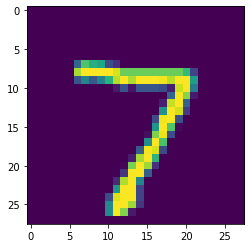

In [ ]:
example = np.empty((1, 28, 28))
example[0] = x_test[0]
plt.imshow(example[0])
print(MNIST_model(example))
print("Network beleives this is a: {}".format(np.argmax(MNIST_model(example))))

In [ ]:
def make_confu_mat(predictions, true_values):
  confu_mat = np.zeros((10, 10), dtype=np.int16)

  num_correct = 0
  for i in range(true_values.shape[0]):
    confu_mat[np.argmax(predictions[i]), true_values[i]] += 1
    if np.argmax(predictions[i]) == true_values[i]:
      num_correct += 1
  print(confu_mat)
  print("number of correct predicitons: {} out of: {}, accuracy: {}%".format(num_correct, true_values.shape[0],  num_correct/true_values.shape[0]))

print("training data performance is :")
make_confu_mat(MNIST_model(x_train), y_train)
print("-------------------------------------")
print("testing data performance is :")
make_confu_mat(MNIST_model(x_test), y_test)

training data performance is :
[[5863    2   97   42   27   38   53    3   39   25]
 [   1 6622    6    1    7    4   15    8   17    2]
 [   6   52 5683   55   29   19   19   59   27    6]
 [   1   14   42 5755    0   47    1   24   45   16]
 [   5   10   13    3 5670    9   36   13   15   75]
 [   1    2    4  146    1 5133    8    2    7   14]
 [   4    0    2    0    7   28 5681    1    2    0]
 [   4   10   32   28   24    4    1 6109   10   73]
 [  35   19   70   56    6   70  104   10 5595   14]
 [   3   11    9   45   71   69    0   36   94 5724]]
number of correct predicitons: 57835 out of: 60000, accuracy: 0.9639166666666666%
-------------------------------------
testing data performance is :
[[ 969    0   15    4    2    7   12    1   11    5]
 [   1 1116    2    0    2    1    4    9    2    4]
 [   0   10  975    5    6    1    6   15   10    1]
 [   1    2   11  944    0    5    0   13   18    3]
 [   1    0    4    0  943    4    3    1    6   25]
 [   1    1    2   26  

# **Summary**

*  We can move in the opposite direction of the gradient to decrease a function
*  This allows neural networks to approximate functions that are unknown through samples of the function in the form of a dataset
*  Neural networks learn via gradient descent
*  The size of the step taken in the direction of the gradient is extremely important
  - this parameter is known as the learning rate
  - the optimizer is responsible for scheduling learning rate
    - e.g. applying momentum or different step sizes for different layers
*  The batch size is the number of items in the dataset that are considered simultaneously to calculate the gradient of a single step

# **Luca's rules of thumb**


*   Optimizer: Use the Adam optmizer with a learning rate of $\alpha = 1\times 10^{-3}$ 
*   Loss function:
  * Classification problem: $\rightarrow$ Categorical Cross enthalpy
  * Regression problem: $\rightarrow$ Mean Squared Error
*  Activation function:
  * Interal layer: $\rightarrow$ Relu
  * Output layer: 
    * Output is probability: $\rightarrow$ softmax
    * Output is any real number: $\rightarrow$ dont need to use an activation function
      * Optionally if output needs to be limited to (0, 1): $\rightarrow$ sigmoid
      * Optionally if output needs to be limited to (-1, 1): $\rightarrow$ tanh
*  Number of layers: 
  * Dense layer: $\rightarrow$ 2 to 4 dense layers in a row.
  * Convolutional layers: $\rightarrow$ situational
*  Number of neurons per layer: depends on your input/output dimensions and difficulty of task
  * Generally from input to output the number of neurons are: $\rightarrow$ increasing, then constant, then decreasing to required output dimensions.
